In [94]:
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.simplefilter('ignore', np.RankWarning)
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
import pylab

# Номер 1

In [24]:
class LagrangeInterpolator:
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        
        polynomial = 0
        
        for i in range(len(self.xk)):
            l_i = self.yk[i]
            x_i = self.xk[i]
            for x_j in self.xk:
                if x_j != x_i:
                    l_i *= (x - x_j)/(x_i - x_j)
            polynomial += l_i
        
        return polynomial

In [25]:
with np.load('data_7_1.npz') as data:
    x1, y1 = data['x1'], data['y1']

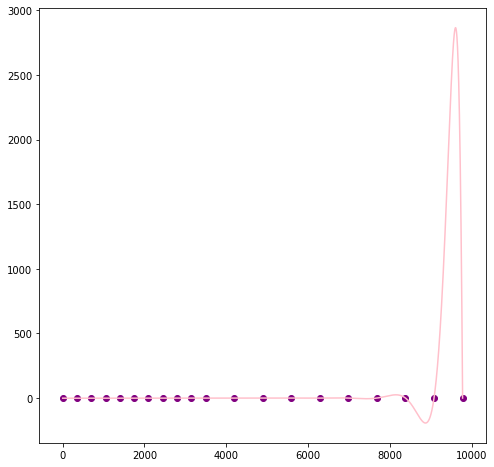

In [26]:
Lagrange = LagrangeInterpolator(x1, y1)
x = np.linspace(0, 9778, 9778)

plt.figure(figsize = (8, 8))
plt.plot(x, Lagrange(x),'pink')
plt.scatter(x1, y1, color='purple')

plt.show()

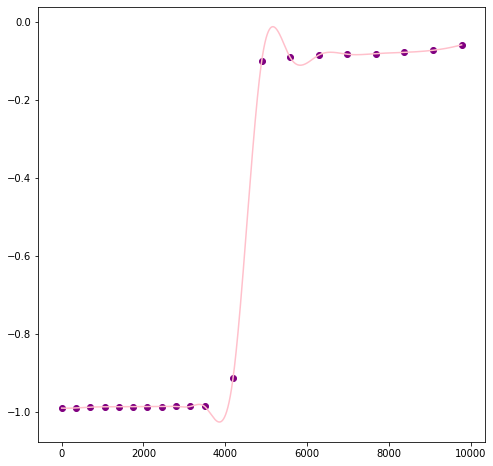

In [27]:
Spline = CubicSpline(x1, y1)

plt.figure(figsize = (8, 8))
plt.plot(x, Spline(x),'pink')
plt.scatter(x1, y1, color='purple')

plt.show()

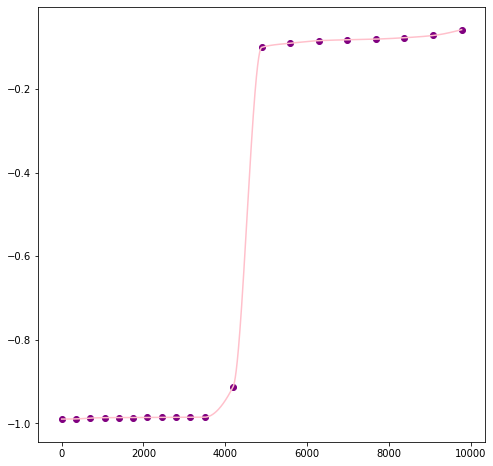

In [28]:
Pchip = PchipInterpolator(x1, y1)

plt.figure(figsize = (8, 8))
plt.plot(x, Pchip(x),'pink')
plt.scatter(x1, y1, color='purple')

plt.show()

# Номер 2

-------------------------------------------------------------------------------------------------------------------


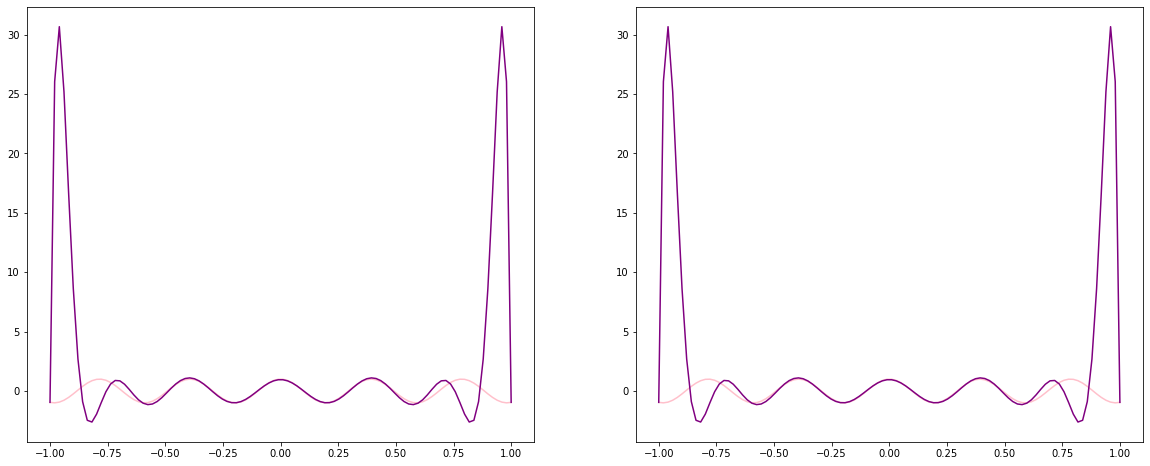

-------------------------------------------------------------------------------------------------------------------


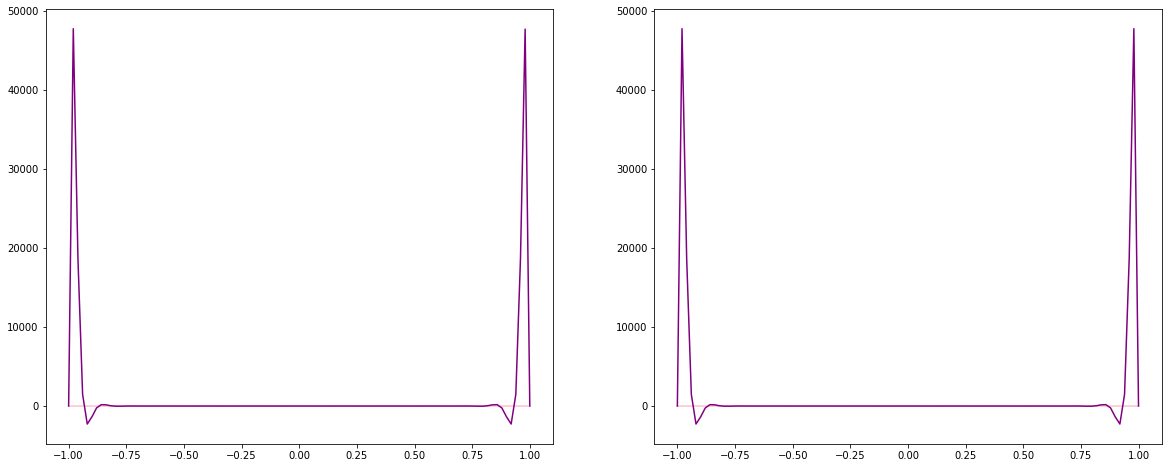

-------------------------------------------------------------------------------------------------------------------


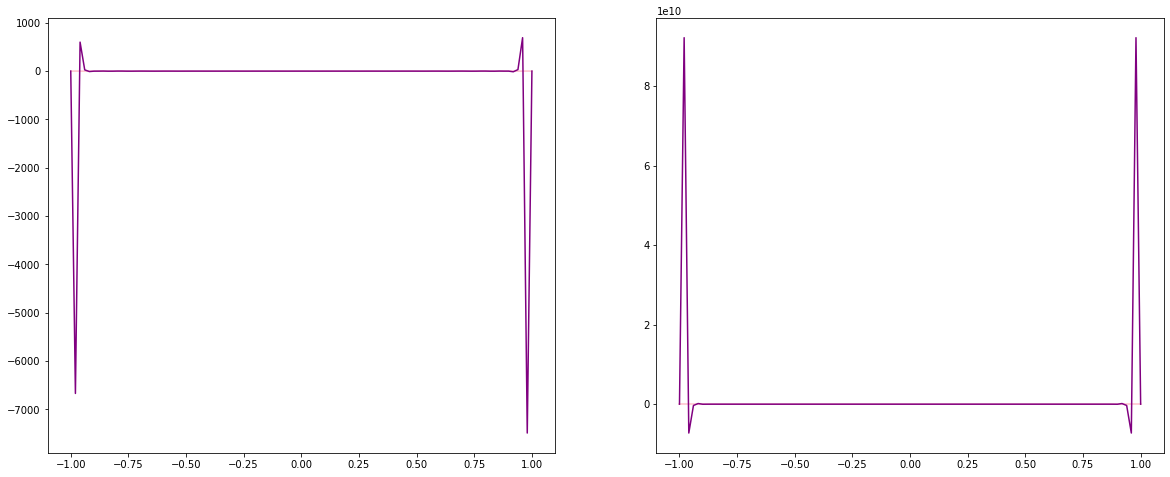

-------------------------------------------------------------------------------------------------------------------


In [56]:
print('-'*115)
for i, n in enumerate([16, 32, 64]):  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
    xx = np.linspace(-1, 1, 100)
    yy = np.cos(n*xx)
    ax1.plot(xx, yy, color = 'pink')
    ax2.plot(xx, yy, color = 'pink')

    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)   
    Lagrange = LagrangeInterpolator(x, y)
    Polyfit = np.polyfit(x, y, n-1)
    
    ax1.plot(xx, np.polyval(Polyfit, xx), color = 'purple', label = 'interpolation')
    ax2.plot(xx, Lagrange(xx), color = 'purple', label = 'interpolation')
    plt.show()
    print('-'*115)

# Номер 3

In [58]:
with np.load('data_7_1.npz') as data:
    x4, y4 = data['x4'], data['y4']

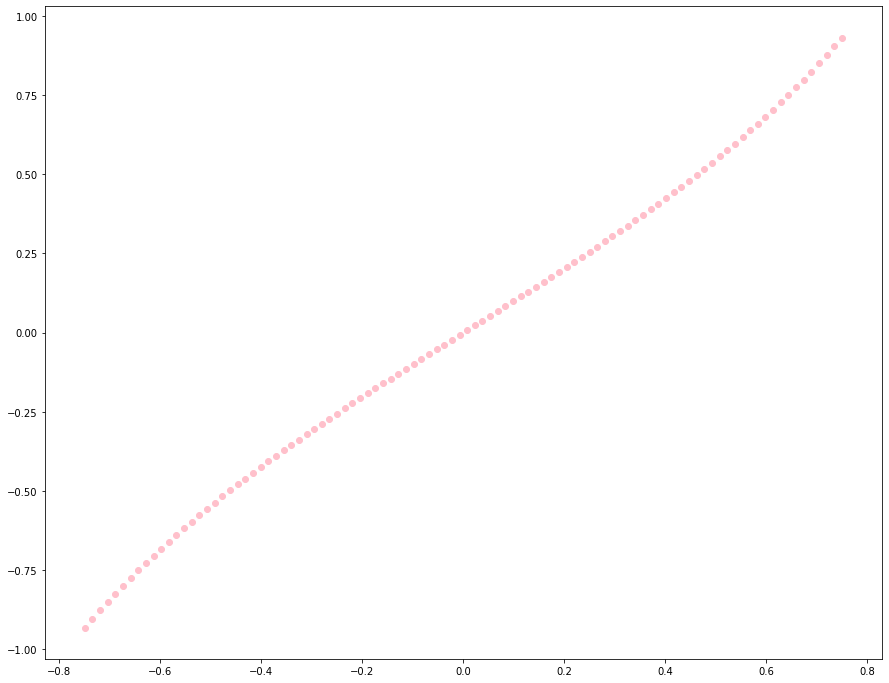

In [82]:
plt.figure(figsize = (15, 12))
plt.scatter(x4, y4,color = 'pink')
plt.show()

In [83]:
def y_1(x, p_0, p_1, p_2, p_3, p_4, p_5):
    return p_0+p_1*x+p_2*x**2+p_3*x**3+p_4*x**4+p_5*x**5

def y_2(x, p_0, p_1, p_2, p_3, q_1, q_2):
    return (p_0+p_1*x+p_2*x**2+p_3*x**3)/(1+q_1*x+q_2*x**2)

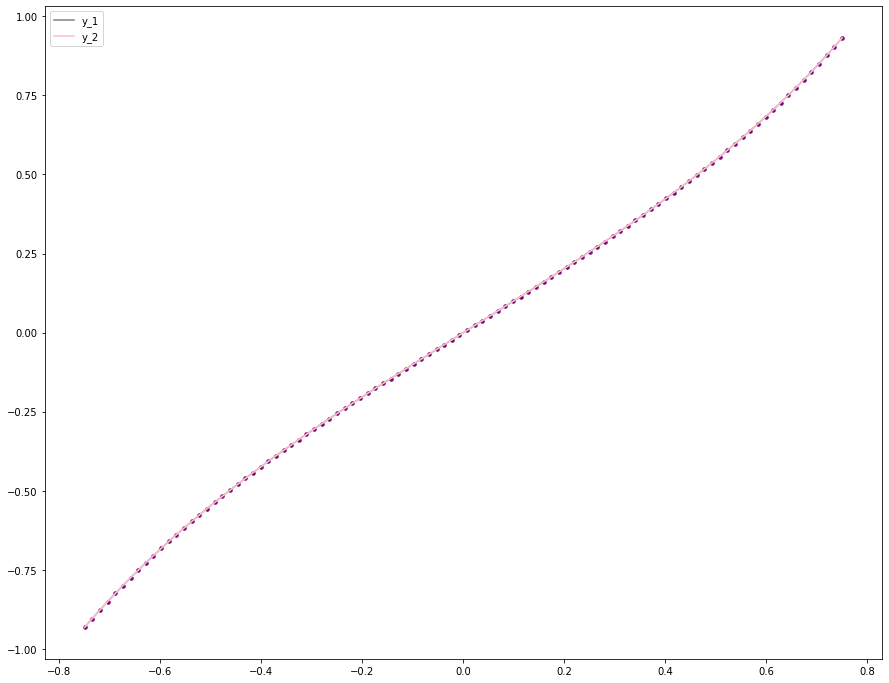

In [84]:
x = np.linspace(-0.75, 0.75, 500)
curve1, _ = curve_fit(y_1, x4, y4)
curve2, _ = curve_fit(y_2, x4, y4)
plt.figure(figsize = (15, 12))
plt.plot(x, y_1(x, *curve1), color ='gray', label='y_1')
plt.plot(x, y_2(x, *curve2), color ='pink', label='y_2')
plt.scatter(x4, y4, color = 'purple', s=12)
plt.legend(loc = 'upper left')
plt.show()

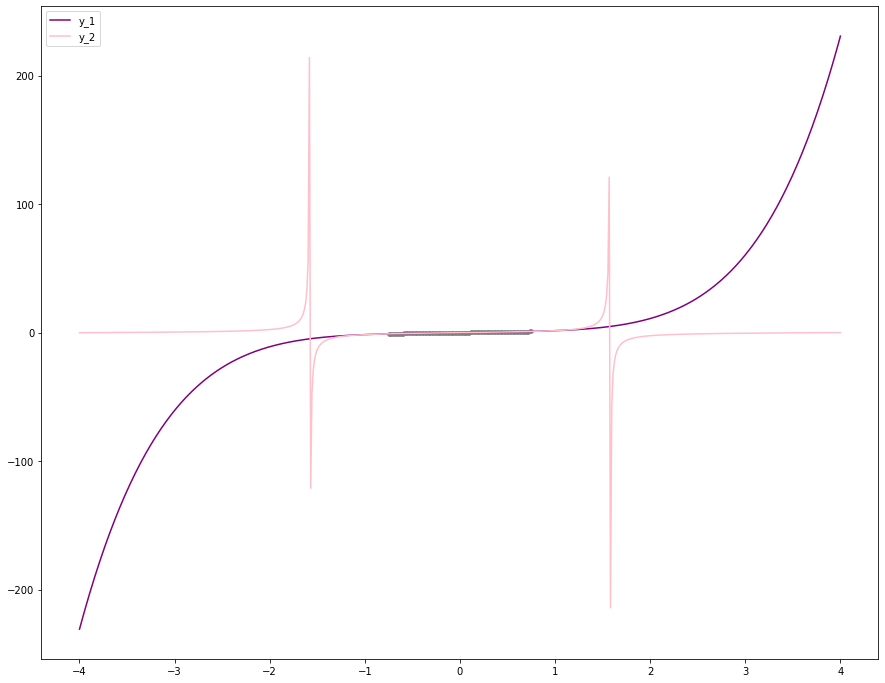

In [85]:
x = np.linspace(-4, 4, 600)
plt.figure(figsize=(15, 12))
plt.plot(x, y_1(x, *curve1), color ='purple', label='y_1')
plt.plot(x, y_2(x, *curve2), color ='pink', label='y_2')
plt.scatter(x4, y4, color = 'gray', s=12)
plt.legend(loc = 'upper left')
plt.show()

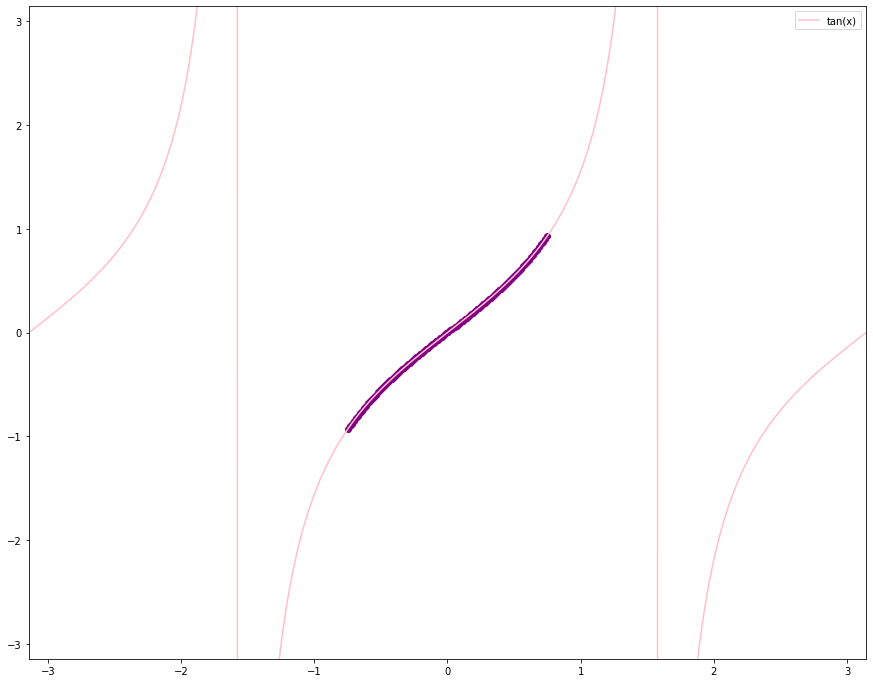

In [81]:
x = np.linspace(-np.pi, np.pi, 500)
plt.figure(figsize=(15, 12))

plt.scatter(x4, y4,color = 'purple')
plt.plot(x, np.tan(x),'pink', label='tan(x)')

plt.legend()
plt.ylim((-np.pi, np.pi))
plt.xlim((-np.pi, np.pi))
plt.show()

# Номер 4

In [173]:
N = 50
x = np.linspace(0,15,N)
y = x*2**(np.sin(x))
h = np.diff(x)
del_y = np.diff(y)
A = np.zeros(shape = (N,N))
b = np.zeros(shape=(N,1))

In [174]:
for i in range(1,N-1):
    A[i, i-1] = h[i-1]
    A[i, i+1] = h[i]
    A[i,i] = 2*(h[i-1]+h[i])
    b[i] = 3*(del_y[i]/h[i] - del_y[i-1]/h[i-1])
    
temp = np.zeros(N)
temp[0] = 2*(h[0]+h[1])
temp[1] = h[1]
temp[-1] = h[0]
A[0] = temp
b[0] = 3*(y[2]-y[1])/h[1]-3*(y[1]-y[0])/h[0]

temp=np.zeros(N)
temp[-1] = 2*(h[-2]+h[-1])
temp[-2] = h[-2]
temp[0] = h[1]
A[-1] = temp
b[-1] = 3*(y[-1]-y[-2])/h[-1]-3*(y[-2]-y[-3])/h[-2]

print(A)

[[1.2244898  0.30612245 0.         ... 0.         0.         0.30612245]
 [0.30612245 1.2244898  0.30612245 ... 0.         0.         0.        ]
 [0.         0.30612245 1.2244898  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.2244898  0.30612245 0.        ]
 [0.         0.         0.         ... 0.30612245 1.2244898  0.30612245]
 [0.30612245 0.         0.         ... 0.         0.30612245 1.2244898 ]]


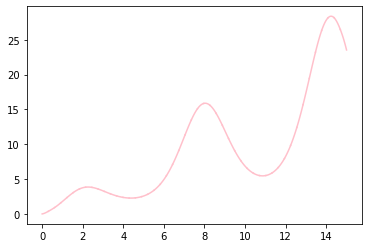

In [175]:
c = np.linalg.solve(A,b)
a = y
d = np.zeros(shape = (N-1,1))
b = np.zeros(shape = (N-1,1))
for i in range(0,len(d)):
    d[i] = (c[i+1] - c[i]) / (3*h[i])
    b[i] = (del_y[i]/h[i]) - (h[i]/3)*(2*c[i] + c[i+1])
for j in range(N-1):
    xx = np.linspace(x[j],x[j+1], 100)
    curve = lambda t: a[j]+b[j]*(t-x[j])+c[j]*(t-x[j])**2+d[j]*(t-x[j])**3
    plt.plot(xx, curve(xx),"pink")

plt.show()

# Номер 5

In [ ]:
def solvation(A,u,v,b):
    N = len(A)
    ab = np.zeros((3,N))
    
    ab[1,0] = A[0,0]
    ab[2,0] = A[0,1]
    
    for i in range(1, N - 1):
        ab[0,i] = A[i - 1,i]
        ab[1,i] = A[i,i]
        ab[2,i] = A[i + 1,i]
        
    ab[0,-1] = A[-2,-1]
    ab[1,-1] = A[-1,11]
    
    re